In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\data science\\spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3958,ham,Have a nice day my dear.,NaN,NaN,NaN
465,ham,great princess! I love giving and receiving or...,NaN,NaN,NaN
2357,ham,Okay same with me. Well thanks for the clarifi...,NaN,NaN,NaN
2279,ham,"Sorry, I'll call later in meeting",NaN,NaN,NaN
4254,spam,Block Breaker now comes in deluxe format with ...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1.Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
3346,ham,No problem baby. Is this is a good time to tal...
4653,ham,Hope you are having a great day.
3908,ham,Serious? What like proper tongued her
425,ham,Ok. She'll be ok. I guess
3437,ham,Its good to hear from you


In [11]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3069,ham,I'm now but have to wait till 2 for the bus to...
1109,ham,S s..first time..dhoni rocks...
5142,ham,Now that you have started dont stop. Just pray...
2920,ham,"Yo, any way we could pick something up tonight?"
1532,ham,Unfortunately i've just found out that we have...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# cheak the duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [18]:
# cheak the duplicate values
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

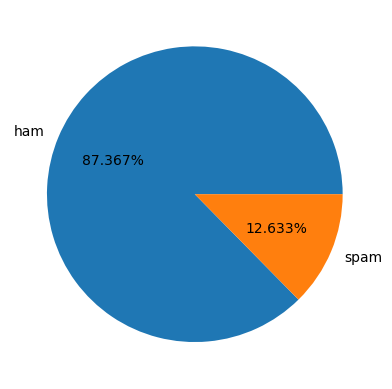

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.3f%%')
plt.show()

In [24]:
# data is imbalanced

In [25]:
!pip install nltk

# nltk :- natural language tool kit

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# spam
# ham
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

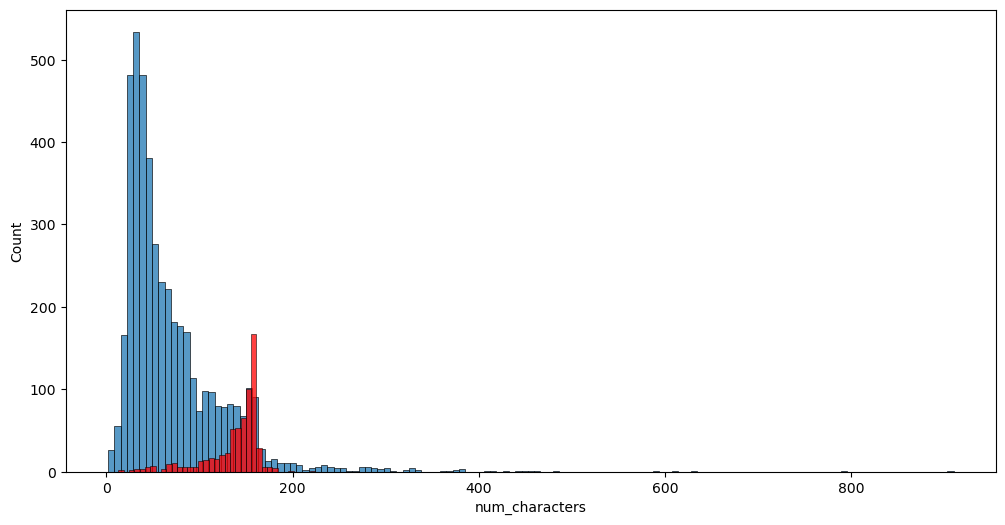

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

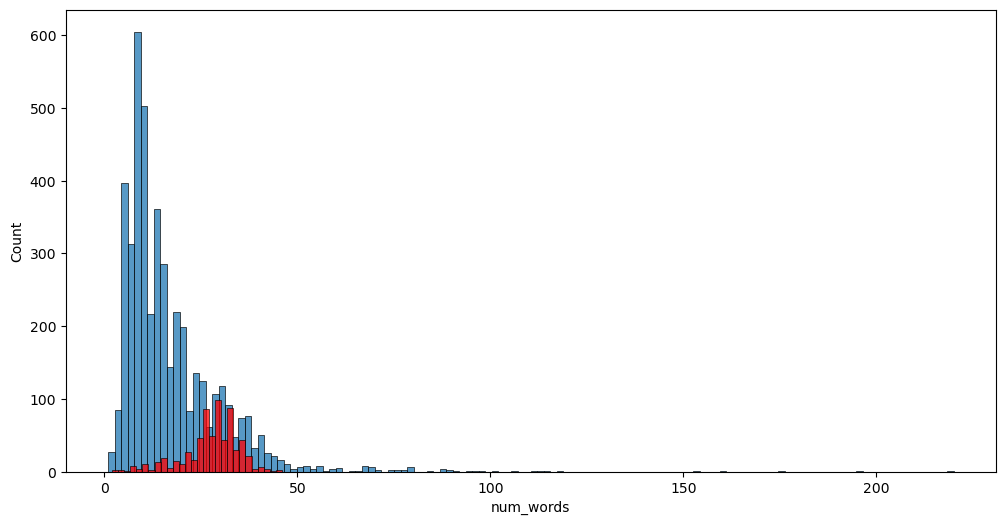

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


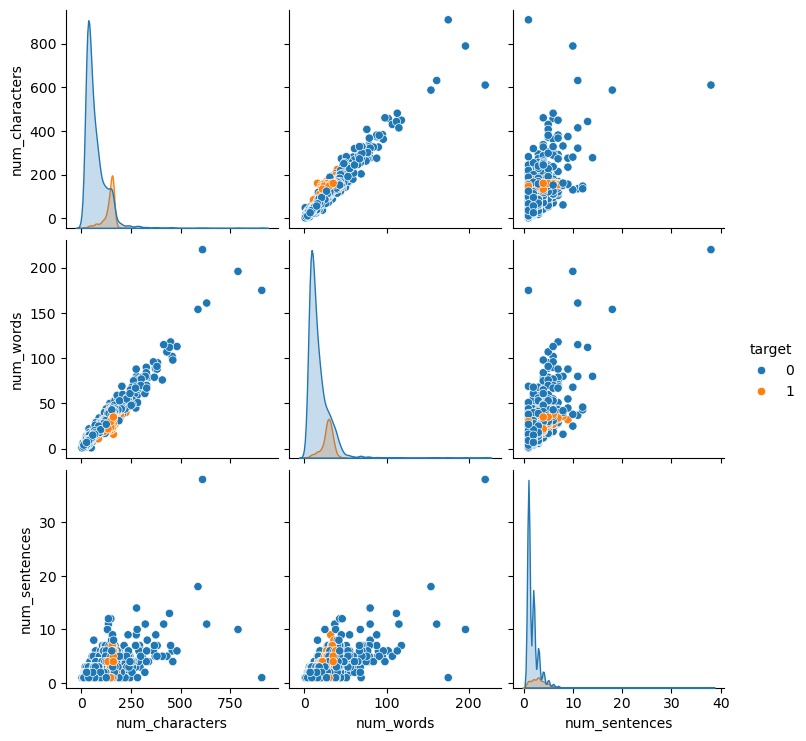

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

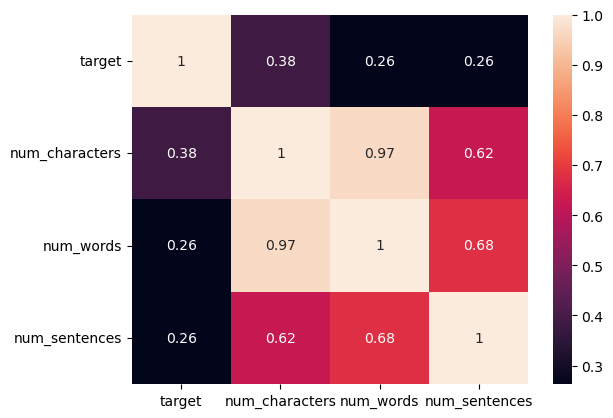

In [41]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## 3.Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming

In [43]:
# nltk.download('stopwords')

# stopwords :- in nlp , stopwords are commonly used words that are filtered out 
# during text processing because they don't carry much meaning and can hinder 
# the performance of certain nlp tasks.example include articles 
# (like "the","a","an"), prepositions(like "in","on","at")and 
# conjunction(like "and","but","or")

In [ ]:
# stemming and lemmanization are both text normalization techniques used
# in natural language processing (nlp) to reduce words to their root form.

# stemming :- operators on a single word without knowledge of the context

# lemmatization :- can leverage conext to find the correct lemma of a word

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    y=[]
    # initialization the porter stemmer
    ps=PorterStemmer()
    # tokenize the input text into words
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            # apply stemmung to the word
            stemmed_word=ps.stem(word)
            y.append(stemmed_word)

    return y

# example usage
text="i'm gonna be home soon and i don't want to talk ablout this staff anymore tonight,k? i've cried enough today"
result=transform_text(text)
print(result)

["'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', 'ablout', 'staff', 'anymor', 'tonight', 'k', "'ve", 'cri', 'enough', 'today']


In [45]:
df['text'][25] #25th row of text

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


In [48]:
# pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
filtered_df=df[df['target']==1]  #spam

# clean the "transformed_text" columns to ensure it contain only  strins and drop none values
filtered_df['transformed_text']=filtered_df['transformed_text'].astype(str).str.strip()

# concatenate the cleaned string using .str.cat()
spam_wc=wc.generate(filtered_df['transformed_text'].str.cat(sep=" "))

C:\Users\hp\AppData\Local\Temp\ipykernel_2936\4290904380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['transformed_text']=filtered_df['transformed_text'].astype(str).str.strip()


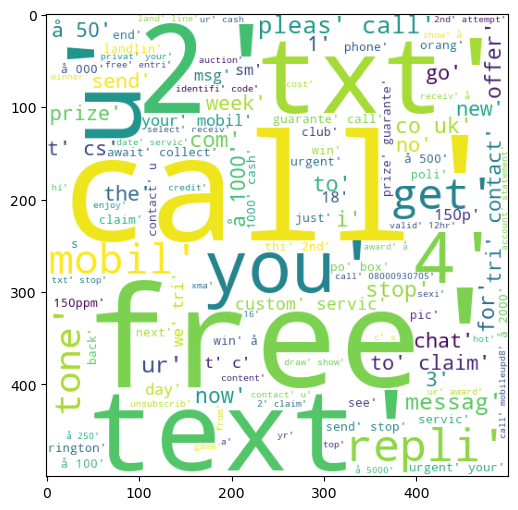

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
# filter the dataframe to incllude only rows where 'target' is equle to 0
filtered_df=df[df['target']==0]  #

# clean the "transformed_text" columns to ensure it contain only  strins and drop none values
filtered_df['transformed_text']=filtered_df['transformed_text'].astype(str).str.strip()

# concatenate the cleaned string using .str.cat()
ham_wc=wc.generate(filtered_df['transformed_text'].str.cat(sep=" "))

C:\Users\hp\AppData\Local\Temp\ipykernel_2936\4171029628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['transformed_text']=filtered_df['transformed_text'].astype(str).str.strip()


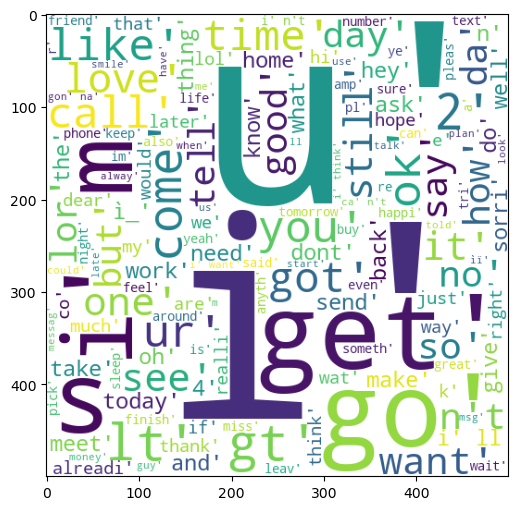

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


* *countVectorizer simply counts word occurrences , while TF-IDF considers both term frequency and inverse document frequency to weight words based on their importance within a document and across the corppus*

In [55]:
spam_corpus=[]

# iterate over the list of messages (which are already tokenixed)

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

11911

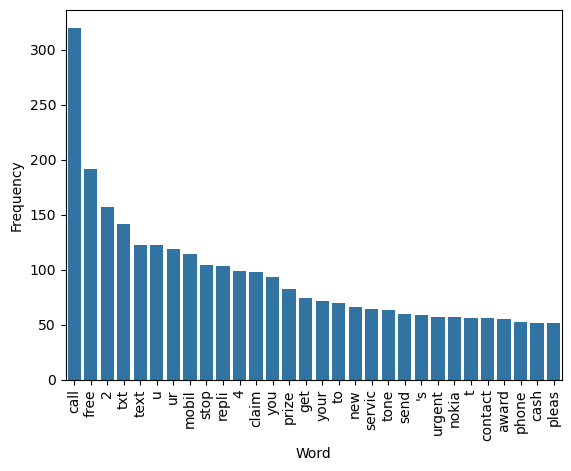

In [57]:
from collections import Counter
# Count top 30 most common words
most_common = Counter(spam_corpus).most_common(30)

# Create a DataFrame
df1 = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

# Plot using seaborn
sns.barplot(x='Word', y='Frequency', data=df1)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus=[]

# iterate over the list of messages (which are already tokenixed)

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

45235

In [60]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[thi, 2nd, time, tri, 2, contact, u., u, å£750..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[will, ì_, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, mood, so, ..., suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[the, guy, bitch, i, act, like, 'd, interest, ..."


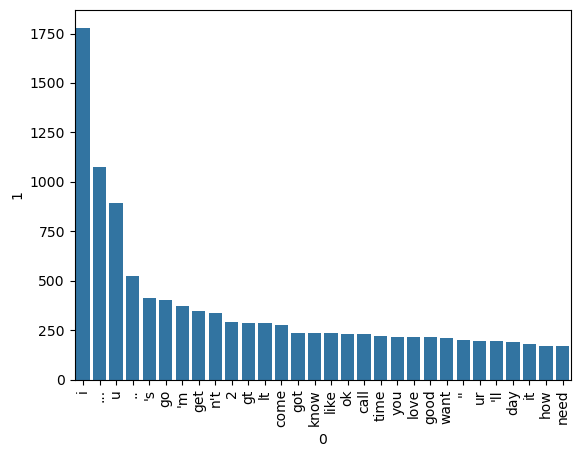

In [61]:
from collections import Counter

# Create the DataFrame first
top_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Then create the plot
sns.barplot(x=top_ham[0], y=top_ham[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# text vertorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, .., avail, bugi, n,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, n't, think, goe, usf, live, around, t..."


## 4. Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [65]:
# convert the list of tokenized words into string by joining by grouping them
corpus=[' '.join(tokens) for tokens in df['transformed_text']]

X=tfidf.fit_transform(corpus).toarray()

In [66]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [67]:
# # appending the sum_charaters col to X
# X=np.hstack((X,df['num_characters'].value.reshape(-1,1)))

In [68]:
X.shape

(5169, 3000)

In [69]:
y=df['target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8810444874274661
[[792 104]
 [ 19 119]]
0.5336322869955157


In [75]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [77]:
# tfidf -----> MNB

In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2) 

In [83]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [87]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9796905222437138, 0.9915966386554622)

In [88]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9796905222437138
Precision -  0.9915966386554622
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453
For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9327731092436975
For  Bgc
Accuracy -  0.9593810444874274
Precision -  0.8478260869565217
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9479166666666666
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.952


In [89]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.974855,1.000000
0,SVC,0.979691,0.991597
5,RF,0.976789,0.983051
8,ETC,0.978723,0.975410
4,LR,0.959381,0.952830
10,xgb,0.975822,0.952000
9,GBDT,0.949710,0.947917
6,AdaBoost,0.966151,0.932773
7,Bgc,0.959381,0.847826


In [92]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.974855
2,SVC,Accuracy,0.979691
3,RF,Accuracy,0.976789
4,ETC,Accuracy,0.978723
5,LR,Accuracy,0.959381
6,xgb,Accuracy,0.975822
7,GBDT,Accuracy,0.949710
8,AdaBoost,Accuracy,0.966151
9,Bgc,Accuracy,0.959381


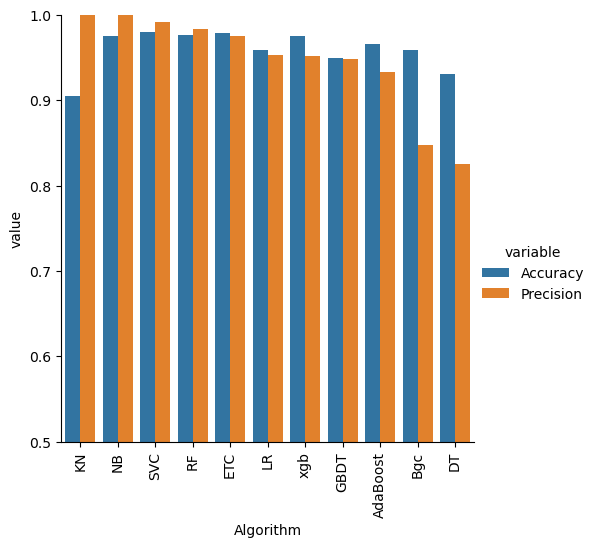

In [94]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# model improve
# 1/ change the max_features parameter of TfIdf

In [96]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Acccuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Acccuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [98]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [100]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Acccuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Acccuracy_scaling_x,Precision_scaling_x,Acccuracy_scaling_y,Precision_scaling_y,Acccuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,SVC,0.979691,0.991597,0.979691,0.991597,0.979691,0.991597,0.979691,0.991597
3,RF,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
4,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
5,LR,0.959381,0.952830,0.959381,0.952830,0.959381,0.952830,0.959381,0.952830
6,xgb,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000
7,GBDT,0.949710,0.947917,0.949710,0.947917,0.949710,0.947917,0.949710,0.947917
8,AdaBoost,0.966151,0.932773,0.966151,0.932773,0.966151,0.932773,0.966151,0.932773
9,Bgc,0.959381,0.847826,0.959381,0.847826,0.959381,0.847826,0.959381,0.847826


In [102]:
# voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
precision 0.9918032786885246


In [106]:
# applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [109]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
precision 0.9694656488549618
